# AI Impact On Jobs

This analysis is trying to understand how the implementation of AI in different industries can impact the jobs of employees.

### Importing Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('My_Data.csv')

### Data Information

In [3]:
df.head()

,Job titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


Job Titles: Names of various roles across different industries.

AI Impact: The percentage representation of AI's influence on each job title, indicating how much AI technology has transformed the role.

Tasks: The number of tasks performed by humans associated with each job title, offering insight into the range and complexity of responsibilities.

AI Models: The count of AI models or systems implemented or utilized within each job title, showing the level of AI integration into the workflow.

AI Workload Ratio: A calculated ratio indicating the distribution of workload between tasks performed by humans and those managed by AI models, providing insight into the balance of human labor and AI automation.

Domain: The broader industry or sector to which each job title belongs, providing context about the specific field in which the role operates.

In [4]:
df.shape

(4706, 6)

There are a total of 4706 rows and 6 columns in the dataset.

### Performing Data Check

#### Checking datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titles         4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


#### Statistical Check

In [6]:
df.describe()

,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4706.000000
mean,400.708032,1817.678071,inf
std,311.564781,1086.853037,NaN
min,1.000000,0.000000,0.036585
25%,161.000000,1085.250000,0.137271
50%,270.000000,1577.500000,0.199281
75%,608.750000,2273.000000,0.260572
max,1387.000000,5666.000000,inf


There seems to be certain values in 'AI_Workload_Ratio' that are causing anamolies on performing statistical check.

In [7]:
df1 = df.copy()

In [8]:
df1['AI_Workload_Ratio'].replace([np.inf,-np.inf], np.nan, inplace = True)

In [9]:
df1[df1['AI_Workload_Ratio'].isna() == True]

,Job titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
3034,Charter Pilot,20%,2,0,NaN,Medical & Healthcare
3035,Commercial Pilot,20%,2,0,NaN,Supply Chain & Logistics
3036,Conductor,20%,2,0,NaN,Law Enforcement
3037,Corporate Pilot,20%,2,0,NaN,Construction
3184,Dog Groomer,20%,4,0,NaN,Medical & Healthcare
3211,Constable,20%,3,0,NaN,Data & IT
3322,Crossing Guard,20%,2,0,NaN,Administrative & Clerical


In [10]:
df.loc[df1[df1['AI_Workload_Ratio'].isna()].index]

,Job titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
3034,Charter Pilot,20%,2,0,inf,Medical & Healthcare
3035,Commercial Pilot,20%,2,0,inf,Supply Chain & Logistics
3036,Conductor,20%,2,0,inf,Law Enforcement
3037,Corporate Pilot,20%,2,0,inf,Construction
3184,Dog Groomer,20%,4,0,inf,Medical & Healthcare
3211,Constable,20%,3,0,inf,Data & IT
3322,Crossing Guard,20%,2,0,inf,Administrative & Clerical


Above rows contained 'inf' as value in column AI_Workload_Ratio, resulting in anamoly. Such rows need to be handled to avoid interference with investigation.

#### Handling Missing Values

In [11]:
df1.isna().sum()

Job titles           0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    7
Domain               0
dtype: int64

In [12]:
df2 = df1.copy()

In [13]:
mean_val = df2['AI_Workload_Ratio'].mean()

df2['AI_Workload_Ratio'].fillna(mean_val, inplace = True)

In [14]:
df2.isna().sum()

Job titles           0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64

#### Checking for duplicates

In [15]:
df2.duplicated().sum()

0

### Feature Engineering 

In [16]:
def convert(percent):
    num = int(percent.rstrip('%'))
    return num   

In [17]:
df2['AI Impact(In Percent%)'] = df2['AI Impact'].apply(convert)

In [18]:
df2.head()

,Job titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,AI Impact(In Percent%)
0,Communications Manager,98%,365,2546,0.143362,Communication & PR,98
1,Data Collector,95%,299,2148,0.139199,Data & IT,95
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical,95
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy,95
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare,92


In [19]:
df3 = df2.drop('AI Impact', axis = 1)
df3.head()

,Job titles,Tasks,AI models,AI_Workload_Ratio,Domain,AI Impact(In Percent%)
0,Communications Manager,365,2546,0.143362,Communication & PR,98
1,Data Collector,299,2148,0.139199,Data & IT,95
2,Data Entry,325,2278,0.142669,Administrative & Clerical,95
3,Mail Clerk,193,1366,0.141288,Leadership & Strategy,95
4,Compliance Officer,194,1369,0.141709,Medical & Healthcare,92


Since AI Impact contains numbers, the values were converted into int by removing '%' and stored in a new column AI Impact(In Percent%). 

### Exploring Data

#### Checking for Categorical and Numerical columns

In [20]:
cat_col = [col for col in df3.columns if df2[col].dtype == 'O']
num_col = [col for col in df3.columns if df2[col].dtype != 'O']

print(f'Categorical columns in the dataset are: {cat_col}')
print(f'Numerical columns in the dataset are: {num_col}')

Categorical columns in the dataset are: ['Job titles', 'Domain']
Numerical columns in the dataset are: ['Tasks', 'AI models', 'AI_Workload_Ratio', 'AI Impact(In Percent%)']


In [21]:
low_card_col = [col for col in cat_col if df3[col].nunique()<=10]
high_card_col = [col for col in cat_col if df3[col].nunique()>10]

print(f'Categorical columns with low cardinality are: {low_card_col}')
print(f'Categorical columns with high cardinality are: {high_card_col}')

Categorical columns with low cardinality are: ['Domain']
Categorical columns with high cardinality are: ['Job titles']


In [22]:
df3['Domain'].value_counts()

Domain
Communication & PR           471
Data & IT                    471
Administrative & Clerical    471
Leadership & Strategy        471
Medical & Healthcare         471
Supply Chain & Logistics     471
Law Enforcement              470
Construction                 470
Sales & Marketing            470
Hospitality                  470
Name: count, dtype: int64

Domain is not the only column with low cardinality but is also fairly balanced

In [23]:
df3.describe()

,Tasks,AI models,AI_Workload_Ratio,AI Impact(In Percent%)
count,4706.000000,4706.000000,4706.000000,4706.000000
mean,400.708032,1817.678071,0.204619,30.312580
std,311.564781,1086.853037,0.076490,18.203777
min,1.000000,0.000000,0.036585,5.000000
25%,161.000000,1085.250000,0.137271,15.000000
50%,270.000000,1577.500000,0.199281,25.000000
75%,608.750000,2273.000000,0.260418,40.000000
max,1387.000000,5666.000000,1.000000,98.000000


1. Tasks range from 1-1387 suggesting that a diverse set of roles and responsibilities are handled by Humans.
2. AI models range from 0-5666 with a mean of 1817 suggesting that a large number of models are present and can be implemented to handle and automate the tasks.  
3. AI_Workload_Ratio range from 0.036585-1.000000. Here a low number suggests heavy  reliability on AI and high number suggests majority of the work is done by human.
4. The "AI Impact" values vary between 5% and 98%, indicating a wide range of AI influence across job titles.

#### What is the distribution of AI impact across different job titles?

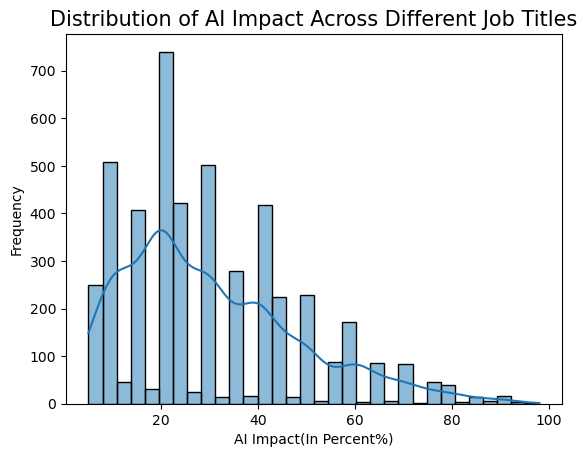

In [24]:
sns.histplot(data = df3, x='AI Impact(In Percent%)', kde=True)
plt.title('Distribution of AI Impact Across Different Job Titles', fontsize=15)
plt.xlabel('AI Impact(In Percent%)')
plt.ylabel('Frequency')
plt.show()

1. Maximum number of jobs have 20% impacted by AI.
2. The distribution skews right, indicating that the majority of job roles experience impacts of up to 40%, with a sharp decline in frequency as the degree of impact rises.
3. AI's effects vary across industries, with some industries experiencing more pronounced impacts than others.

#### Which jobs are impacted the most by AI?

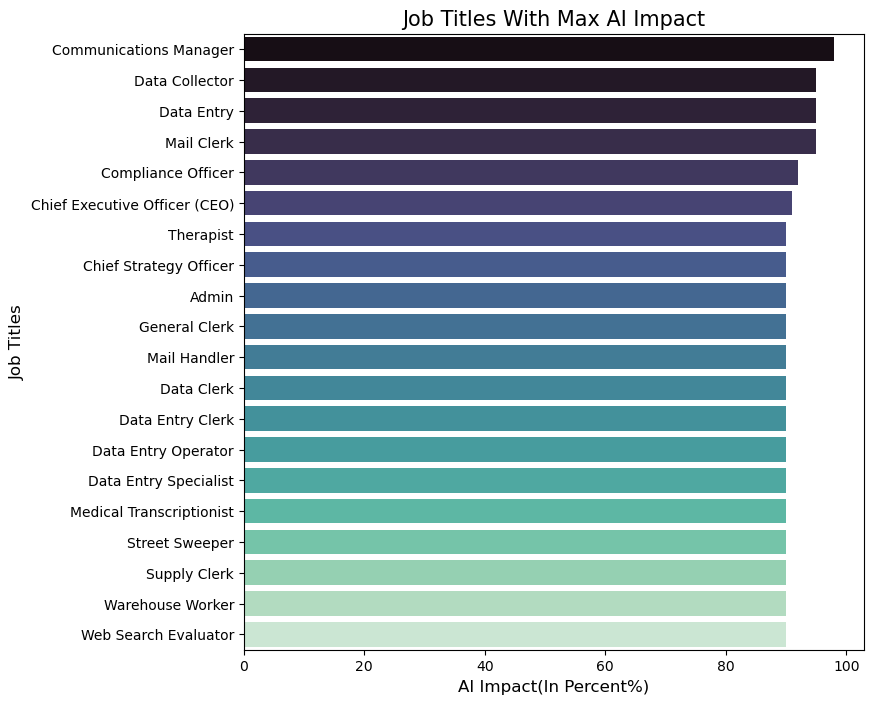

In [58]:
max_impacted_jobs = df3[df3['AI Impact(In Percent%)'] >= 90]


plt.figure(figsize=(8,8))
sns.barplot(data = max_impacted_jobs, x='AI Impact(In Percent%)', y = 'Job titles', orient='h', palette='mako')
plt.title('Job Titles With Max AI Impact', fontsize=15)
plt.xlabel('AI Impact(In Percent%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

In [26]:
max_impacted_jobs['Domain'].value_counts()

Domain
Communication & PR           9
Data & IT                    9
Administrative & Clerical    9
Leadership & Strategy        9
Medical & Healthcare         8
Supply Chain & Logistics     8
Law Enforcement              8
Construction                 8
Sales & Marketing            8
Hospitality                  8
Name: count, dtype: int64

#### What is the impact of AI across different domains ?

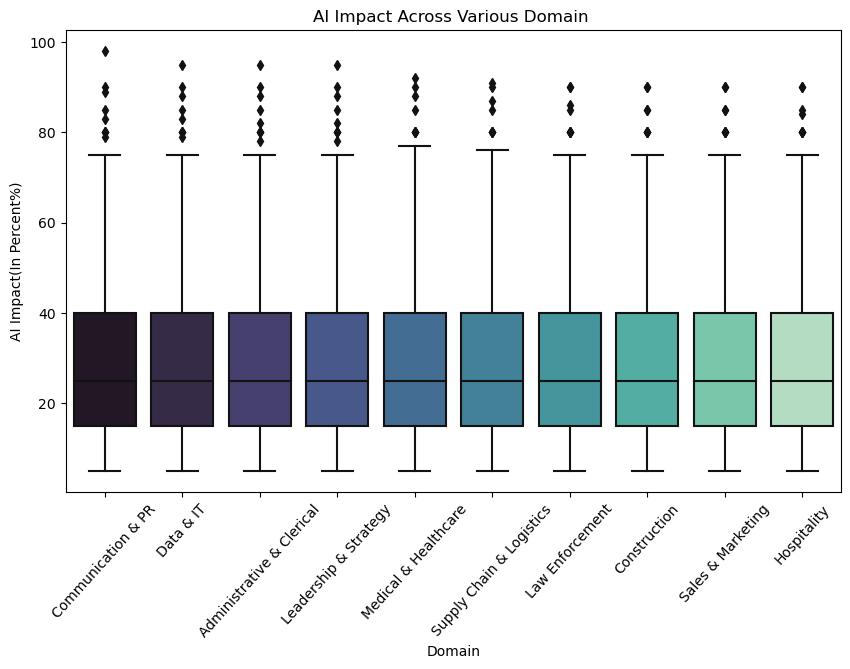

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x ='Domain',y='AI Impact(In Percent%)', data=df3, palette='mako')

plt.xticks(rotation=48)
plt.xlabel('Domain')
plt.ylabel('AI Impact(In Percent%)')
plt.title('AI Impact Across Various Domain ')

plt.show()

The impact of AI looks most pronounced for Communication & PR.

#### How does the distribution of human-performed tasks vary across different job titles?

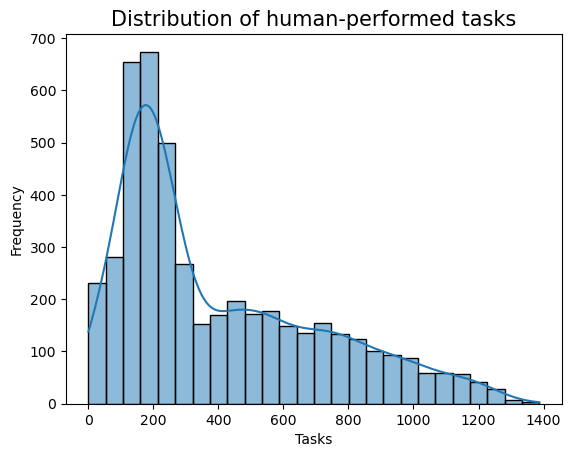

In [28]:
sns.histplot(data = df3, x='Tasks', kde=True)
plt.title('Distribution of human-performed tasks', fontsize=15)
plt.xlabel('Tasks')
plt.ylabel('Frequency')
plt.show()

1. Majority of the employees perform tasks between 100-300. This suggests an optimal number of tasks that can handled by a human. 
2. A sharp decline in task distribution suggests that it's not practical for a human to handle tasks over 300.

#### Which jobs have maximum human performed tasks ?

In [29]:
Q1 = np.percentile(df3['Tasks'],25)
Q3 = np.percentile(df3['Tasks'],75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR


task_outlier = df3[df3['Tasks'] > upper_bound]
task_outlier

,Job titles,Tasks,AI models,AI_Workload_Ratio,Domain,AI Impact(In Percent%)
3396,Script Writer,1299,5364,0.242170,Law Enforcement,20
3397,Senior Technical Writer,1358,5371,0.252839,Construction,20
3400,Writer,1314,5319,0.247039,Communication & PR,20
3414,Program Administrator,1339,5294,0.252928,Medical & Healthcare,20
3415,Program Associate,1329,5313,0.250141,Supply Chain & Logistics,20
3521,Instructional Designer,1387,5666,0.244794,Data & IT,15
3644,Manager,1316,5181,0.254005,Medical & Healthcare,15
3763,Design Manager,1297,5252,0.246954,Leadership & Strategy,15
4006,Learning And Development Specialist,1290,4877,0.264507,Law Enforcement,10
4703,Director,1316,4695,0.280298,Leadership & Strategy,5


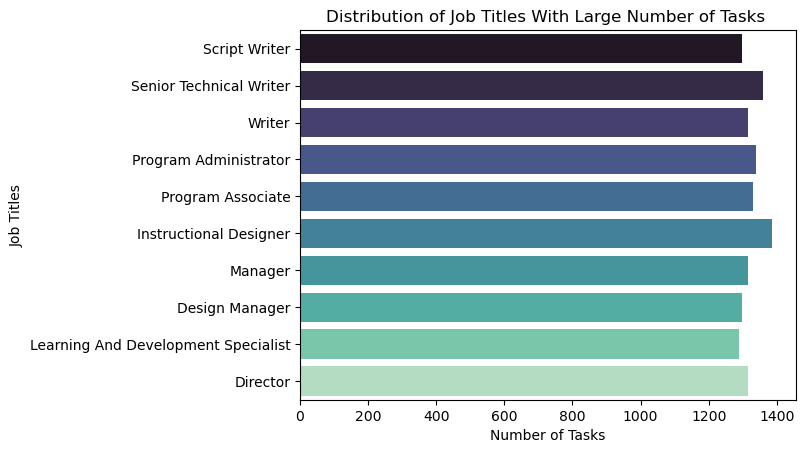

In [30]:
sns.barplot(x ='Tasks',y='Job titles', data=task_outlier, palette='mako')

plt.xlabel('Number of Tasks')
plt.ylabel('Job Titles')
plt.title('Distribution of Job Titles With Large Number of Tasks ')

plt.show()

#### How does the of number of tasks relate to AI impact?

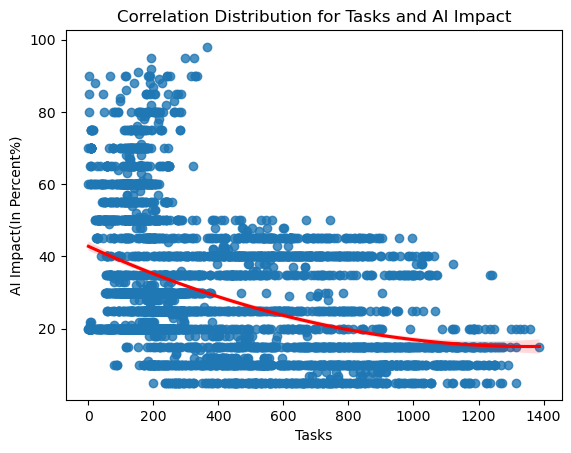

In [31]:
sns.regplot(data=df3, x='Tasks', y='AI Impact(In Percent%)', order=2,line_kws={"color": "red"})
plt.title('Correlation Distribution for Tasks and AI Impact')
plt.xlabel('Tasks')
plt.ylabel('AI Impact(In Percent%)')
plt.show()

In [32]:
df3[['Tasks','AI Impact(In Percent%)']].corr()

,Tasks,AI Impact(In Percent%)
Tasks,1.00000,-0.41976
AI Impact(In Percent%),-0.41976,1.00000


The correlation coefficient between these Tasks and AI Impact is approximately -0.41976, indicating a moderate negative correlation. This suggests that as the impact of AI on tasks increases, the number of tasks tends to decrease, and vice versa.

#### Is there any relation between Tasks and AI model implementation?

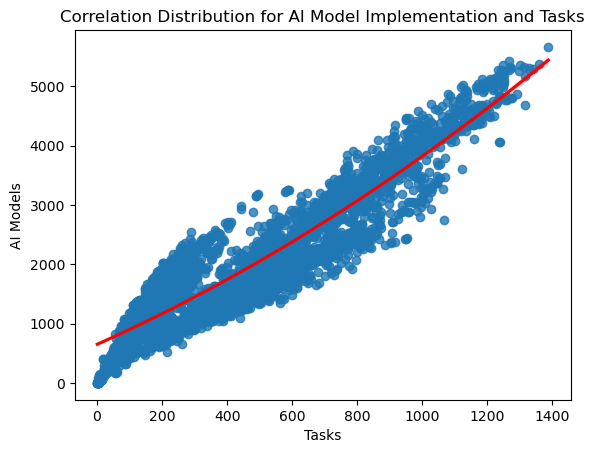

In [33]:
sns.regplot(data=df3, x='Tasks', y='AI models', order=2,line_kws={"color": "red"})
plt.title('Correlation Distribution for AI Model Implementation and Tasks')
plt.xlabel('Tasks')
plt.ylabel('AI Models')
plt.show()

In [34]:
df3[['Tasks','AI models']].corr()

,Tasks,AI models
Tasks,1.00000,0.92835
AI models,0.92835,1.00000


A strong positive correlation of 0.92 can be seen between Tasks performed by humans and implementation of AI models. As the tasks increase the AI Models also increase.

#### Which industries demand the  most human labor?

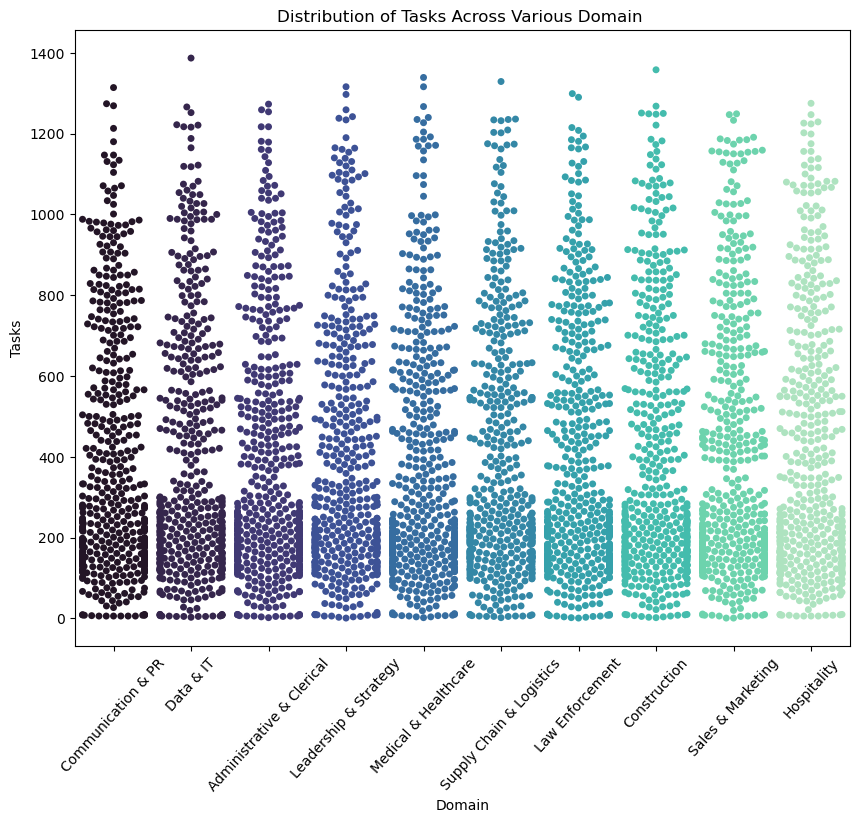

In [35]:
plt.figure(figsize=(10,8))
sns.swarmplot(x ='Domain',y='Tasks', data=df3, palette='mako')

plt.xticks(rotation=48)
plt.xlabel('Domain')
plt.ylabel('Tasks')
plt.title('Distribution of Tasks Across Various Domain ')

plt.show()

The distribution of tasks across various domains looks fairly even. The point to be noted here is that even for an outlier 'Instructional Designer' present in Data & IT with tasks and AI models being 1387 and 5666 respectively, the AI impact is only 15%.	

#### Can the amount to tasks impact the AI workload ratio ?

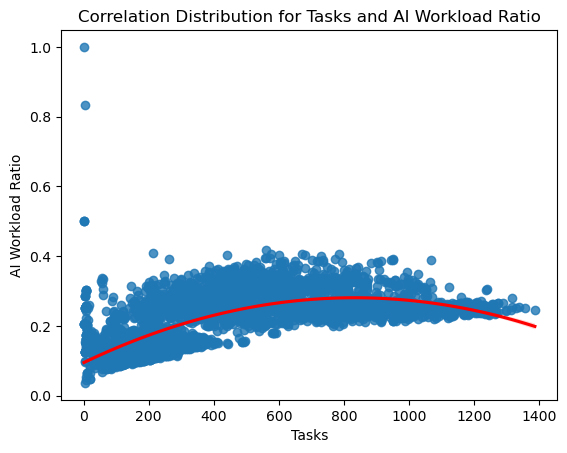

In [36]:
sns.regplot(data=df3, x='Tasks', y='AI_Workload_Ratio',order = 2,line_kws={"color": "red"})
plt.title('Correlation Distribution for Tasks and AI Workload Ratio')
plt.xlabel('Tasks')
plt.ylabel('AI Workload Ratio')
plt.show()

In [37]:
df3[['Tasks','AI_Workload_Ratio']].corr()

,Tasks,AI_Workload_Ratio
Tasks,1.000000,0.630536
AI_Workload_Ratio,0.630536,1.000000


A moderate positive correlation of 0.63 is observed between tasks and AI worload ratio. As tasks increase the workload being handled by a human will also increase. 

#### How does the implementation of AI models vary across different job titles?

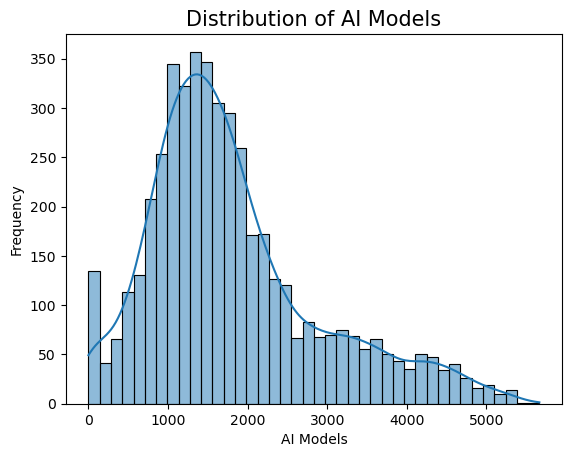

In [38]:
sns.histplot(data = df3, x='AI models', kde=True)
plt.title('Distribution of AI Models', fontsize=15)
plt.xlabel('AI Models')
plt.ylabel('Frequency')
plt.show()

A right skewed graph is observed yet again, with majority of the AI model implementation within the range of 1000-2000.

In [39]:
Q1,Q3 = df3['AI models'].quantile([0.25,0.75])

IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR


AI_model_outlier = df3[df3['AI models'] > upper_bound]
AI_model_outlier.sort_values(by = 'AI models',ascending= False, inplace = True)
AI_model_outlier

,Job titles,Tasks,AI models,AI_Workload_Ratio,Domain,AI Impact(In Percent%)
3521,Instructional Designer,1387,5666,0.244794,Data & IT,15
3801,Junior Copywriter,1266,5425,0.233364,Data & IT,15
3397,Senior Technical Writer,1358,5371,0.252839,Construction,20
3396,Script Writer,1299,5364,0.242170,Law Enforcement,20
3759,Business Specialist,1247,5360,0.232649,Hospitality,15
...,...,...,...,...,...,...
3794,Real Estate Developer,956,4077,0.234486,Medical & Healthcare,15
4127,Newspaper Reporter,950,4074,0.233186,Construction,10
1544,Technical Consultant,1240,4070,0.304668,Medical & Healthcare,35
1545,Technology Consultant,1236,4064,0.304134,Supply Chain & Logistics,35


#### Which job roles are likely to see maximum AI model implementation?

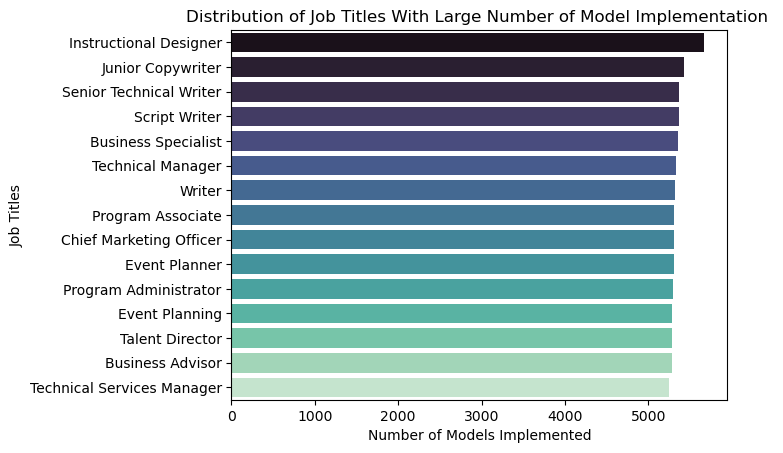

In [40]:
sns.barplot(x ='AI models',y='Job titles', data=AI_model_outlier.head(15), palette='mako')

plt.xlabel('Number of Models Implemented')
plt.ylabel('Job Titles')
plt.title('Distribution of Job Titles With Large Number of Model Implementation ')

plt.show()

#### Does number of AI models implemented affect the AI impact on employee jobs?

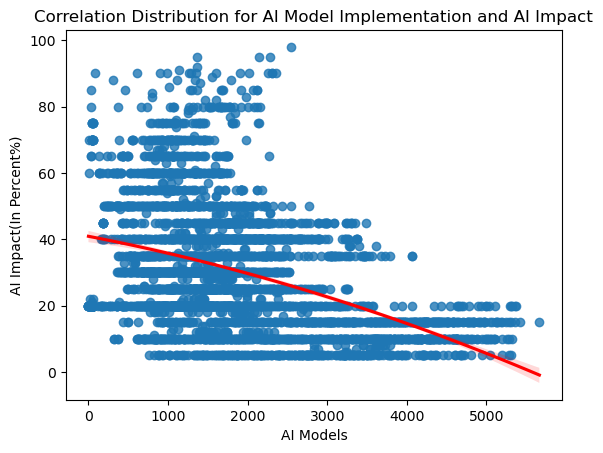

In [41]:
sns.regplot(data=df3, x='AI models', y='AI Impact(In Percent%)', order=2,line_kws={"color": "red"})
plt.title('Correlation Distribution for AI Model Implementation and AI Impact')
plt.xlabel('AI Models')
plt.ylabel('AI Impact(In Percent%)')
plt.show()

In [42]:
df3[['AI models','AI Impact(In Percent%)']].corr()

,AI models,AI Impact(In Percent%)
AI models,1.000000,-0.413176
AI Impact(In Percent%),-0.413176,1.000000


The plot suggests that as the count of AI models implemented increases, the AI impact percentage on job titles tends to decrease moderately, and vice versa.

#### Which industry has the maximum chances of incorporating AI models?

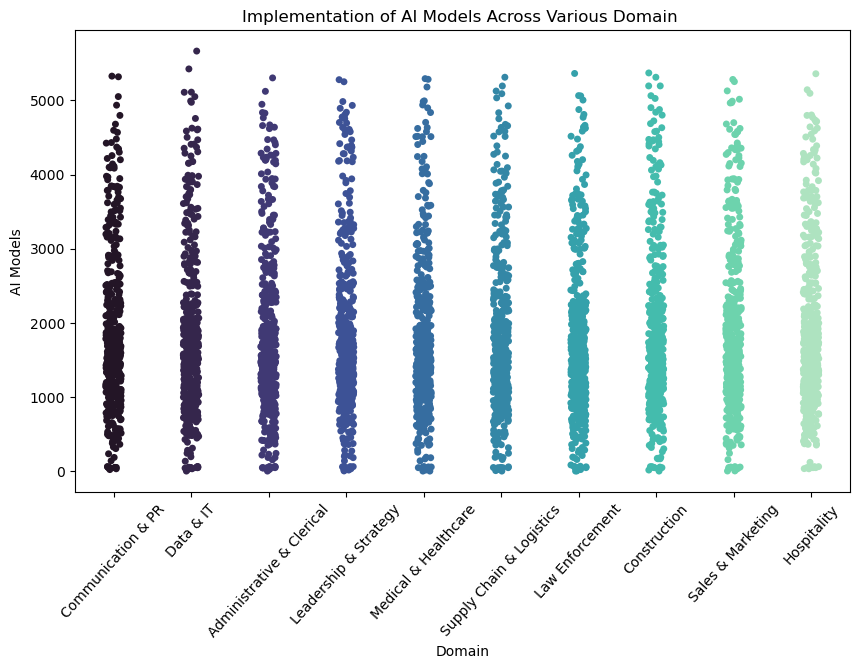

In [43]:
plt.figure(figsize=(10,6))
sns.stripplot(y='AI models',x ='Domain', data=df3, palette='mako')

plt.xticks(rotation=48)
plt.xlabel('Domain')
plt.ylabel('AI Models')
plt.title('Implementation of AI Models Across Various Domain ')

plt.show()

From the above plot it's pretty clear that implementation of AI models is maximum in Data & IT industry.

#### Is there any correlation between AI models and workload ratio ?

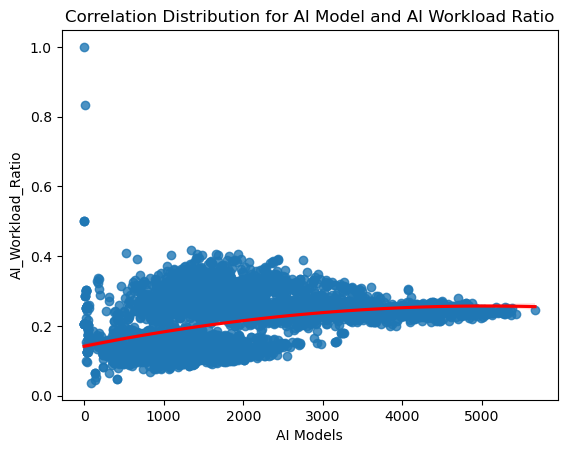

In [44]:
sns.regplot(data=df3, x='AI models', y='AI_Workload_Ratio', order=2,line_kws={"color": "red"})
plt.title('Correlation Distribution for AI Model and AI Workload Ratio')
plt.xlabel('AI Models')
plt.ylabel('AI_Workload_Ratio')
plt.show()

In [45]:
df3[['AI models','AI_Workload_Ratio']].corr()

,AI models,AI_Workload_Ratio
AI models,1.00000,0.34617
AI_Workload_Ratio,0.34617,1.00000


There is a moderate positive relationship between the count of AI models implemented and the AI workload ratio. But since the correlation is not very strong it can be said that AI model implementation doesn't have significant affect on AI workload ratio.

#### What is the distribution of AI workload ratios across different job titles?

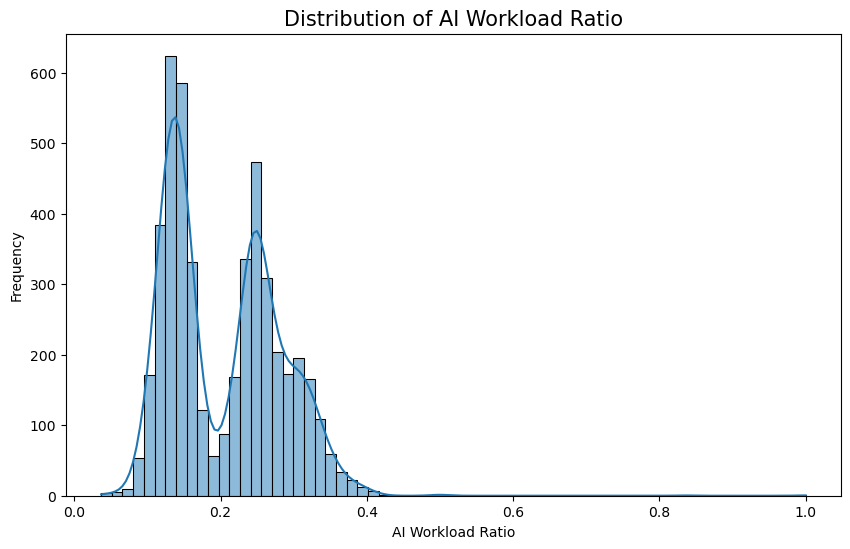

In [46]:
plt.figure(figsize=(10,6))

sns.histplot(data = df3, x='AI_Workload_Ratio', kde=True)
plt.title('Distribution of AI Workload Ratio', fontsize=15)
plt.xlabel('AI Workload Ratio')
plt.ylabel('Frequency')
plt.show()

The majority of job titles exhibit an AI workload ratio nearing zero, with a second smaller peak observed around the range of 0.2 to 0.3, indicating a bimodal distribution. This implies that although numerous job titles have a minimal AI workload ratio, a noteworthy portion of jobs also reply on artificial intelligence.

#### Which job roles have extreme AI workload ratio?

In [47]:
Q1,Q3 = df3['AI_Workload_Ratio'].quantile([0.25,0.75])

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

workload_ratio_outlier = df3[(df3['AI_Workload_Ratio'] > upper_bound) | (df3['AI_Workload_Ratio'] < lower_bound)]
workload_ratio_outlier.sort_values(by = 'AI_Workload_Ratio',ascending= False, inplace = True)
workload_ratio_outlier

,Job titles,Tasks,AI models,AI_Workload_Ratio,Domain,AI Impact(In Percent%)
3058,After School Teacher,1,1,1.000000,Sales & Marketing,20
3185,Dog Trainer,5,6,0.833333,Supply Chain & Logistics,20
186,Flooring Installer,1,2,0.500000,Law Enforcement,70
413,Safety Coordinator,1,2,0.500000,Leadership & Strategy,60
3358,Front Office Manager,1,2,0.500000,Sales & Marketing,20


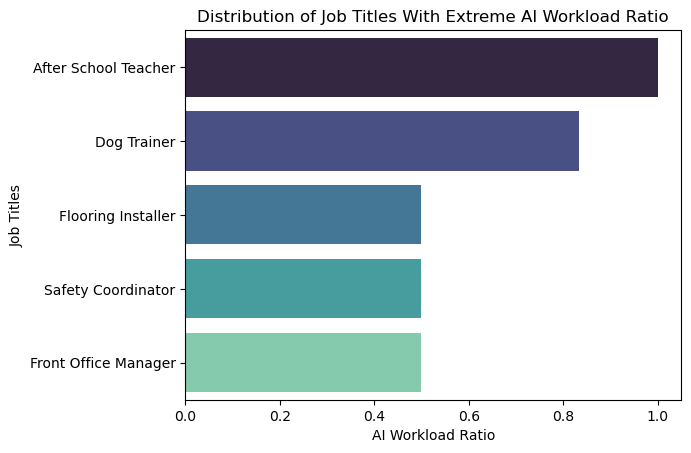

In [48]:
sns.barplot(x ='AI_Workload_Ratio',y='Job titles', data=workload_ratio_outlier, palette='mako')

plt.xlabel('AI Workload Ratio')
plt.ylabel('Job Titles')
plt.title('Distribution of Job Titles With Extreme AI Workload Ratio')

plt.show()

In [49]:
df3.head()

,Job titles,Tasks,AI models,AI_Workload_Ratio,Domain,AI Impact(In Percent%)
0,Communications Manager,365,2546,0.143362,Communication & PR,98
1,Data Collector,299,2148,0.139199,Data & IT,95
2,Data Entry,325,2278,0.142669,Administrative & Clerical,95
3,Mail Clerk,193,1366,0.141288,Leadership & Strategy,95
4,Compliance Officer,194,1369,0.141709,Medical & Healthcare,92


#### What is the distribution of AI workload ratio across different domains?

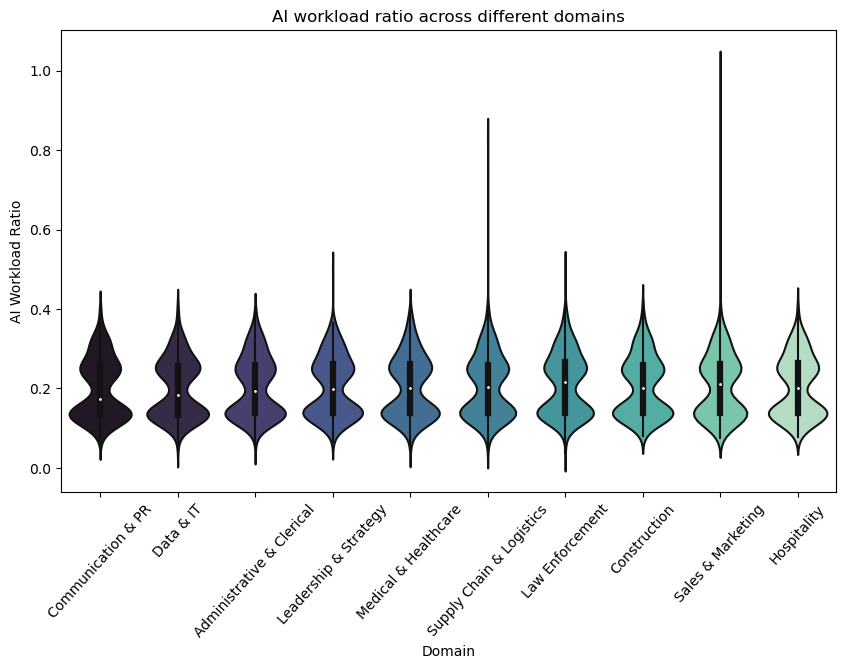

In [50]:
plt.figure(figsize=(10,6))
sns.violinplot(y='AI_Workload_Ratio',x ='Domain', data=df3, palette='mako')

plt.xticks(rotation=48)
plt.xlabel('Domain')
plt.ylabel('AI Workload Ratio')
plt.title('AI workload ratio across different domains')

plt.show()

From the above plot it's evident that Supply Chain & Logistics and Sales & Marketing are two industries consisting of job roles with very high AI workload ratio.

#### How does AI impact behave when AI Workload Ratio changes?

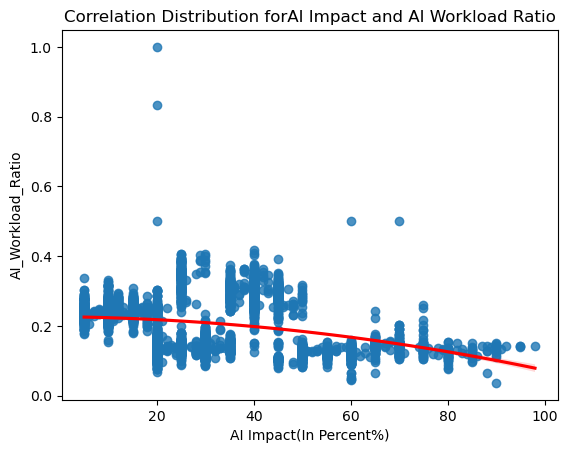

In [51]:
sns.regplot(data=df3, x='AI Impact(In Percent%)', y='AI_Workload_Ratio', order=2,line_kws={"color": "red"})
plt.title('Correlation Distribution forAI Impact and AI Workload Ratio')
plt.xlabel('AI Impact(In Percent%)')
plt.ylabel('AI_Workload_Ratio')
plt.show()

In [52]:
df3[['AI Impact(In Percent%)','AI_Workload_Ratio']].corr()

,AI Impact(In Percent%),AI_Workload_Ratio
AI Impact(In Percent%),1.000000,-0.287802
AI_Workload_Ratio,-0.287802,1.000000


A weak correlation negative between AI impact and workload ratio suggests that an increased AI impact can reduce human labor to some extent. 